In [ ]:
# Program to predict diabetes using Logistic Regression designed by Reuben Martor 

In [ ]:
# turn off warnings to avoid warnings
import warnings
warnings.filterwarnings('ignore')
# install required packages
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
df= pd.read_csv('df_diabetes.csv')

In [15]:
# convert all columns to integer
df = df.astype(int)
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,...,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000
mean,0.500000,0.556084,0.513299,0.975731,30.067098,0.458165,0.060561,0.142366,0.709965,0.608933,...,0.960951,0.080571,2.806723,3.985264,5.482275,0.242244,0.474744,8.543961,4.976950,6.119932
std,0.500002,0.496846,0.499825,0.153885,7.108331,0.498249,0.238524,0.349426,0.453780,0.487991,...,0.193711,0.272177,1.094795,8.241093,9.842604,0.428443,0.499364,2.935200,1.007873,2.339402
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [16]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [17]:
df.dtypes # check datatypes
df.shape

(137828, 22)

In [18]:
# check for missing values
df.isnull().sum() # no missing values 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

/var/folders/8j/2s9r3d016dv78wt0ll08q3k00000gn/T/ipykernel_10856/1522112032.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Age', 'GenHlth', 'MentHlth', 'BMI','Income','Education','PhysHlth']] = scaler.fit_transform(df_clean[['Age', 'GenHlth', 'MentHlth', 'BMI','Income','Education','PhysHlth']])


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0,0,0,1,-0.453505,0,0,0,1,1,...,1,0,-1.489538,-0.427706,4.869001,0,1,1.600308,0.856153,0.505862
3,0,1,1,1,-0.079141,1,0,0,1,1,...,1,0,0.843342,-0.427706,1.177706,0,1,0.921650,0.856153,0.505862
4,0,0,0,1,0.108041,1,0,0,1,1,...,1,0,-0.323098,-0.427706,-0.404278,0,0,-0.096336,-0.254055,0.505862
7,0,0,0,1,0.482405,1,0,0,0,1,...,1,0,2.009782,-0.427706,-0.404278,0,1,-0.774993,-1.364264,-1.986180
8,0,0,0,1,0.669587,0,0,0,1,1,...,1,0,0.843342,-0.427706,-0.404278,0,0,-1.792979,0.856153,0.505862


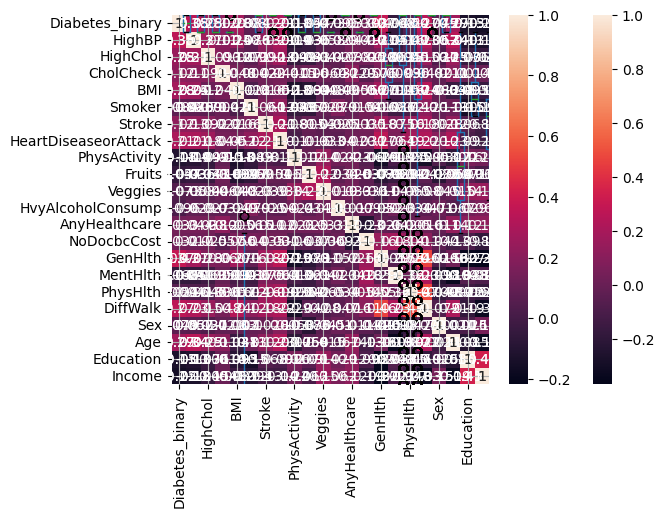

In [19]:
# plot distribution of diabetes

import seaborn as sns

sns.countplot(x='Diabetes_binary', data=df)

# check for correlation between features

corr = df.corr()
sns.heatmap(corr, annot=True)

# check for outliers

df.boxplot(figsize=(10, 10))

# handle outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[~((df < (lower_bound)) | (df > (upper_bound))).any(axis=1)]
df_clean.shape

# check for correlation between features after outlier handling 

corr_clean = df_clean.corr()
sns.heatmap(corr_clean, annot=True)

# save cleaned df to df_diabetes_cleaned.csv   
df_clean.head() 

# feature normalization for continuous varibales like age, weight, height, BMI, etc.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df_clean[['Age', 'GenHlth', 'MentHlth', 'BMI','Income','Education','PhysHlth']] = scaler.fit_transform(df_clean[['Age', 'GenHlth', 'MentHlth', 'BMI','Income','Education','PhysHlth']])

df_clean.head()



In [20]:
df_clean.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0,0,0,1,-0.453505,0,0,0,1,1,...,1,0,-1.489538,-0.427706,4.869001,0,1,1.600308,0.856153,0.505862
3,0,1,1,1,-0.079141,1,0,0,1,1,...,1,0,0.843342,-0.427706,1.177706,0,1,0.921650,0.856153,0.505862
4,0,0,0,1,0.108041,1,0,0,1,1,...,1,0,-0.323098,-0.427706,-0.404278,0,0,-0.096336,-0.254055,0.505862
7,0,0,0,1,0.482405,1,0,0,0,1,...,1,0,2.009782,-0.427706,-0.404278,0,1,-0.774993,-1.364264,-1.986180
8,0,0,0,1,0.669587,0,0,0,1,1,...,1,0,0.843342,-0.427706,-0.404278,0,0,-1.792979,0.856153,0.505862


<Axes: xlabel='Diabetes_binary', ylabel='count'>

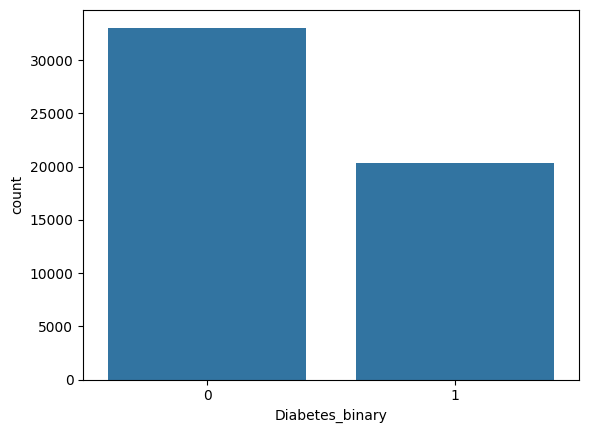

In [21]:
# now plot distribution of those with diabetes and those without diabetes

sns.countplot(x='Diabetes_binary', data=df_clean)   



In [22]:
X = df_clean.drop('Diabetes_binary', axis=1)

y = df_clean['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a logistic regression model


log_model = LogisticRegression()

log_model.fit(X_train, y_train)


LogisticRegression()

In [23]:
# evaluate the model

y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("Classification Report:")

print(classification_report(y_test, y_pred))

# cross-validation

scores = cross_val_score(log_model, X, y, cv=5)

print("Cross-Validation Scores:", scores)

print("Cross-Validation Mean Score:", scores.mean())


Accuracy: 0.7394624541438946
Confusion Matrix:
[[6820 1506]
 [1974 3057]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      8326
           1       0.67      0.61      0.64      5031

    accuracy                           0.74     13357
   macro avg       0.72      0.71      0.72     13357
weighted avg       0.74      0.74      0.74     13357

Cross-Validation Scores: [0.73891072 0.74864308 0.73748245 0.74085166 0.7371081 ]
Cross-Validation Mean Score: 0.7405992034850964


ROC AUC Score: 0.7133767518636436


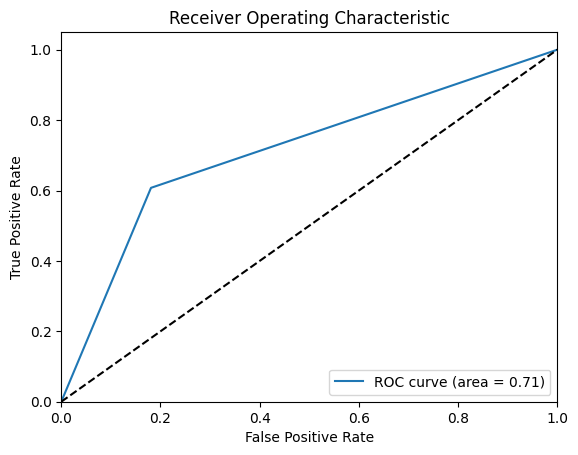

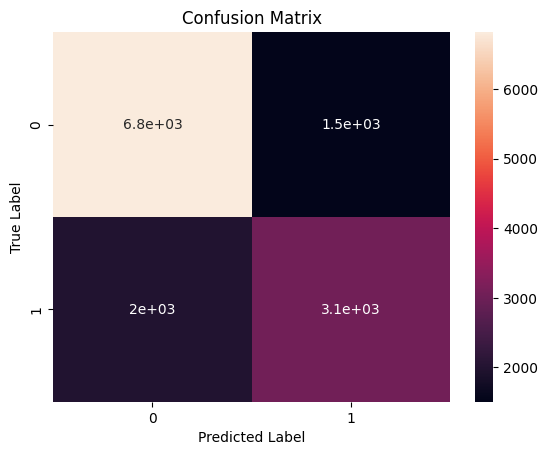

Confusion Matrix:
[[6820 1506]
 [1974 3057]]


In [24]:
# construct a ROC curve and calculate the AUC score

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

print("ROC AUC Score:", roc_auc)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc="lower right")

plt.show()

# construct a confusion matrix and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  

sns.heatmap(conf_matrix, annot=True)

plt.title('Confusion Matrix')

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.show()
print("Confusion Matrix:")

print(conf_matrix)



In [27]:
# construct df to display predicted and actual values

df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

df_results.head(10)

# save the model

import pickle

filename = 'diabetes_logistic_regression_model.sav'

pickle.dump(log_model, open(filename, 'wb'))

# load the model

loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, y_test)

print(result)

# predict using the loaded model

prediction = loaded_model.predict(X_test)

print(prediction)

# predict using the loaded model

# show results in a table

df_results = pd.DataFrame({'Predicted': prediction, 'Actual': y_test})

df_results.head(20)

# save the model



0.7394624541438946
[0 1 0 ... 0 0 1]


,Predicted,Actual
44293,0,1
104720,1,1
95243,0,0
100266,0,0
56758,1,1
120072,1,1
53494,1,1
22635,0,0
12261,0,0
120606,0,1
